# Feature Selection & Engineering

In [21]:
# Install your required packages here
!pip install seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 800)

## Load Data

In [ ]:
df_logs = pd.read_csv('../data/mini/log_mini.csv')
df_features = pd.read_csv('../data/mini/tf_mini.csv').set_index('track_id')

## Load Data

In [22]:
df_logs = pd.read_csv('../data/mini/log_mini.csv')
df_features = pd.read_csv('../data/mini/tf_mini.csv').set_index('track_id')

## Load Data

In [23]:
df_logs = pd.read_csv('../data/mini/log_mini.csv')
df_features = pd.read_csv('../data/mini/tf_mini.csv').set_index('track_id')

## Data Preparation

In [24]:
df_features = pd.get_dummies(data=df_features, columns=['mode'])
# Join track features and logs
data = df_logs.join(df_features, on='track_id_clean', how='left')
data.drop(columns=['date'], inplace=True)

In [25]:
data.dtypes

session_id                          object
session_position                     int64
session_length                       int64
track_id_clean                      object
skip_1                                bool
skip_2                                bool
skip_3                                bool
not_skipped                           bool
context_switch                       int64
no_pause_before_play                 int64
short_pause_before_play              int64
long_pause_before_play               int64
hist_user_behavior_n_seekfwd         int64
hist_user_behavior_n_seekback        int64
hist_user_behavior_is_shuffle         bool
hour_of_day                          int64
premium                               bool
context_type                        object
hist_user_behavior_reason_start     object
hist_user_behavior_reason_end       object
duration                           float64
release_year                         int64
us_popularity_estimate             float64
acousticnes

In [26]:
# Remove all non-categorical data
data_cat = data.select_dtypes(exclude=['int64', 'float64'])
# merge session_position, session_length
data_cat = pd.merge(data[['session_position', 'session_length']], data_cat, left_index=True, right_index=True)
# drop skip_1 and skip_3?
data_cat.dtypes

session_position                    int64
session_length                      int64
session_id                         object
track_id_clean                     object
skip_1                               bool
skip_2                               bool
skip_3                               bool
not_skipped                          bool
hist_user_behavior_is_shuffle        bool
premium                              bool
context_type                       object
hist_user_behavior_reason_start    object
hist_user_behavior_reason_end      object
mode_major                          uint8
mode_minor                          uint8
dtype: object

In [27]:
data_cat.shape

(167880, 15)

In [28]:
# Remove all categorical data
data_no_cat = data.select_dtypes(exclude=['object', 'bool'])
data_no_cat.dtypes

session_position                   int64
session_length                     int64
context_switch                     int64
no_pause_before_play               int64
short_pause_before_play            int64
long_pause_before_play             int64
hist_user_behavior_n_seekfwd       int64
hist_user_behavior_n_seekback      int64
hour_of_day                        int64
duration                         float64
release_year                       int64
us_popularity_estimate           float64
acousticness                     float64
beat_strength                    float64
bounciness                       float64
danceability                     float64
dyn_range_mean                   float64
energy                           float64
flatness                         float64
instrumentalness                 float64
key                                int64
liveness                         float64
loudness                         float64
mechanism                        float64
organism        

In [29]:
data_no_cat.shape

(167880, 39)

In [30]:
# Pipeline Declaration
pipe = Pipeline([('scaler', StandardScaler()),
                ('reducer', PCA(n_components=0.3))])

## Feature Engineering

## PCA

In [31]:
data_PC = pipe.fit_transform(data_no_cat)

In [32]:
# Amount of components needed to get to 90% variance explained
# 37 features in original dataset (merge of logs and features)
components = pipe.steps[1][1].components_
len(components)

3

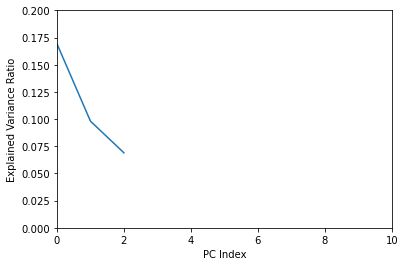

In [33]:
# Variance explained per index plot
var = pipe.steps[1][1].explained_variance_ratio_
plt.plot(var)
plt.axis([0, 10, 0.0, 0.2])
plt.xlabel('PC Index')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [34]:
# Variance explained cummulative sum
pipe.steps[1][1].explained_variance_ratio_.cumsum()

array([0.16928249, 0.26740199, 0.33637288])

In [35]:
data_PC.shape

(167880, 3)

In [36]:
data_PC = pd.DataFrame(data_PC)

In [37]:
# Re-joining the categorical features with the PC dataframe
data = pd.merge(data_cat, data_PC, left_index=True, right_index=True)
data.head()

,session_position,session_length,session_id,track_id_clean,skip_1,skip_2,skip_3,not_skipped,hist_user_behavior_is_shuffle,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,mode_major,mode_minor,0,1,2
0,1,20,0_00006f66-33e5-4de7-a324-2d18e439fc1e,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,True,True,editorial_playlist,trackdone,trackdone,1,0,-0.084801,-0.642602,0.181692
1,2,20,0_00006f66-33e5-4de7-a324-2d18e439fc1e,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,True,True,editorial_playlist,trackdone,trackdone,0,1,-2.704207,-1.271917,-0.857436
2,3,20,0_00006f66-33e5-4de7-a324-2d18e439fc1e,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,True,True,editorial_playlist,trackdone,trackdone,1,0,-0.591955,-0.671749,-0.928603
3,4,20,0_00006f66-33e5-4de7-a324-2d18e439fc1e,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,True,True,editorial_playlist,trackdone,trackdone,1,0,-1.466513,1.423567,-0.763585
4,5,20,0_00006f66-33e5-4de7-a324-2d18e439fc1e,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,True,True,editorial_playlist,trackdone,trackdone,1,0,-3.138003,-0.399707,-0.431176


<AxesSubplot:xlabel='0', ylabel='1'>

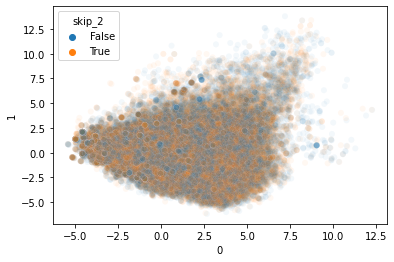

In [38]:
# Plot of PC1/PC2 and Skip_2 
# No clear correlation between skip_2 and PC1/PC2
sn.scatterplot(data=data, x=data[0], y=data[1], hue='skip_2', alpha=0.05)

In [39]:
data.dtypes

session_position                     int64
session_length                       int64
session_id                          object
track_id_clean                      object
skip_1                                bool
skip_2                                bool
skip_3                                bool
not_skipped                           bool
hist_user_behavior_is_shuffle         bool
premium                               bool
context_type                        object
hist_user_behavior_reason_start     object
hist_user_behavior_reason_end       object
mode_major                           uint8
mode_minor                           uint8
0                                  float64
1                                  float64
2                                  float64
dtype: object

In [40]:
# Correlation Between PCs and Skip_2
# Transform bool to int and apply one-out-of-k encoding
data['skip_1'] = data['skip_1'].astype(float)
data['skip_2'] = data['skip_2'].astype(float)
data['skip_3'] = data['skip_3'].astype(float)
data['not_skipped'] = data['not_skipped'].astype(float) 
data['hist_user_behavior_is_shuffle'] = data['hist_user_behavior_is_shuffle'].astype(float) 
data['premium'] = data['premium'].astype(float)
data = pd.get_dummies(data=data, columns=['context_type','hist_user_behavior_reason_start','hist_user_behavior_reason_end'])

In [41]:
corr_matrix = data.corr()
corr_matrix['skip_2']

session_position                              0.040010
session_length                                0.078193
skip_1                                        0.824751
skip_2                                        1.000000
skip_3                                        0.762141
not_skipped                                  -0.731088
hist_user_behavior_is_shuffle                 0.048836
premium                                      -0.016049
mode_major                                   -0.011581
mode_minor                                    0.011581
0                                            -0.015195
1                                            -0.002205
2                                            -0.076196
context_type_catalog                         -0.065949
context_type_charts                           0.009218
context_type_editorial_playlist              -0.009359
context_type_personalized_playlist           -0.017446
context_type_radio                            0.027753
context_ty

## Train/Test with PCA

In [42]:
def split_sessions(data, perc_in=0.6):
    """ Split interactions into train and test sessions. """
    sessions = data['session_id'].unique()
    amt_in = int(perc_in * len(sessions))
    sessions_in = np.random.choice(sessions, amt_in, replace=False)
    sessions_out = np.array(list(set(sessions) - set(sessions_in)))
    indexed_data = data.set_index('session_id')
    data_in = indexed_data.loc[sessions_in]
    data_out = indexed_data.loc[sessions_out]
    return data_in, data_out

In [43]:
train, val = split_sessions(data, 0.6)
print(len(train), len(val))

100839 67041


In [44]:
def stack_sessions(df):
    """
    Turn matrix representation into vector by stacking the listen events together (as columns) 
    For example:
    session_id session_position feature1 feature2
    a          1                ~        ~
    a          2                ~        ~
    b          1                ~        ~
    b          2                ~        ~
    b          3                ~        ~
    
    Turns into:
    session_id 1_feature1 1_feature2 2_feature1 2_feature2 3_feature1 3_feature2
    a          ~          ~          ~          ~          Nan        Nan
    b          ~          ~          ~          ~          ~          ~
    """
    columns = list(df.columns)
    columns.remove('session_id')
    columns.remove('session_position')
    sessions = df.pivot(index='session_id', columns='session_position', values=columns)
    return sessions

In [45]:
# Columns to drop from the second part of the session, because this information is not available for prediction.
# Note that you could still use this information for learning embeddings etc.
drop_cols = list(data.columns)
drop_cols.remove('session_id')
drop_cols.remove('session_position')
drop_cols.remove('track_id_clean')

In [46]:
def split_df(df):
    """
    Split df in data and labels part. First half of session is stacked and joined to each song in the second half of the session.
    Listening information is removed from second half, as it will not be available for prediction.
    """
    # Get sessions for SPOS<10 & reset index: old index added as col, new index added
    first = df.loc[df['session_position']*2 <= df['session_length']].reset_index().drop(columns=['session_length'])
    # Get sessions for SPOS>10 & reset index. 
    second = df.loc[df['session_position']*2 > df['session_length']].reset_index()
    # skip_2 is ground truth
    truth = second['skip_2']
    # Note: if you would print head; some sessions are smaller than 20 so SPOS can be < 10
    # print(second.head())
    # Note: track_id_clean has been dropped way before already
    second.drop(columns=drop_cols, inplace=True)
    first_stacked = stack_sessions(first)
    
    data = second.join(first_stacked, how='left', on='session_id')
    return data, truth

In [47]:
# Wrangle the train and validation sets in the right format.
train_data, train_labels = split_df(train)
val_data, val_labels = split_df(val)

/Users/jenselin/miniconda3/envs/Tensorflow/lib/python3.7/site-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
/Users/jenselin/miniconda3/envs/Tensorflow/lib/python3.7/site-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


In [48]:
train_data.drop(columns=[('track_id_clean', 1), ('track_id_clean', 2), ('track_id_clean', 3), ('track_id_clean', 4), ('track_id_clean', 5), ('track_id_clean', 6), ('track_id_clean', 7), ('track_id_clean', 8), ('track_id_clean', 9), ('track_id_clean', 10)], inplace=True)
val_data.drop(columns=[('track_id_clean', 1), ('track_id_clean', 2), ('track_id_clean', 3), ('track_id_clean', 4), ('track_id_clean', 5), ('track_id_clean', 6), ('track_id_clean', 7), ('track_id_clean', 8), ('track_id_clean', 9), ('track_id_clean', 10)], inplace=True)

In [49]:
val_data.drop(columns=['track_id_clean'], inplace=True)
train_data.drop(columns=['track_id_clean'], inplace=True)

In [50]:
%%time
from sklearn.impute import SimpleImputer

# Fill in NaN values with mean of column. This choice *should* depend on your decision of classifier and feature encoding. Not every approach has the same assumptions about the data.
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
train_data_imp = imp.fit_transform(train_data.drop(columns=['session_id']))
val_data_imp = imp.transform(val_data.drop(columns=['session_id']))

CPU times: user 2.96 s, sys: 723 ms, total: 3.69 s
Wall time: 3.73 s


In [51]:
data.head()

,session_position,session_length,session_id,track_id_clean,skip_1,skip_2,skip_3,not_skipped,hist_user_behavior_is_shuffle,premium,mode_major,mode_minor,0,1,2,context_type_catalog,context_type_charts,context_type_editorial_playlist,context_type_personalized_playlist,context_type_radio,context_type_user_collection,hist_user_behavior_reason_start_appload,hist_user_behavior_reason_start_backbtn,hist_user_behavior_reason_start_clickrow,hist_user_behavior_reason_start_endplay,hist_user_behavior_reason_start_fwdbtn,hist_user_behavior_reason_start_playbtn,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
0,1,20,0_00006f66-33e5-4de7-a324-2d18e439fc1e,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0.0,0.0,0.0,1.0,1.0,1.0,1,0,-0.084801,-0.642602,0.181692,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,2,20,0_00006f66-33e5-4de7-a324-2d18e439fc1e,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,0.0,0.0,0.0,1.0,1.0,1.0,0,1,-2.704207,-1.271917,-0.857436,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,3,20,0_00006f66-33e5-4de7-a324-2d18e439fc1e,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,0.0,0.0,0.0,1.0,1.0,1.0,1,0,-0.591955,-0.671749,-0.928603,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,4,20,0_00006f66-33e5-4de7-a324-2d18e439fc1e,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,0.0,0.0,0.0,1.0,1.0,1.0,1,0,-1.466513,1.423567,-0.763585,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,5,20,0_00006f66-33e5-4de7-a324-2d18e439fc1e,t_64f3743c-f624-46bb-a579-0f3f9a07a123,0.0,0.0,0.0,1.0,1.0,1.0,1,0,-3.138003,-0.399707,-0.431176,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [52]:
# Print samples to learn from and features per sample.
print("train matrix shape:", train_data.shape)
print("labels shape:", train_labels.shape)

train matrix shape: (51136, 332)
labels shape: (51136,)


In [53]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Train a classifier (default parameters are not optimal here!)
model = LogisticRegression(max_iter=500)
model.fit(train_data_imp, train_labels.values)

CPU times: user 31.1 s, sys: 269 ms, total: 31.4 s
Wall time: 8.08 s


/Users/jenselin/miniconda3/envs/Tensorflow/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(max_iter=500)

In [54]:
%%time
# Predict validation data
predictions = model.predict(val_data_imp)

CPU times: user 44.9 ms, sys: 2.67 ms, total: 47.6 ms
Wall time: 15.1 ms


In [55]:
# Convert from flattened format back to session based format (for calculation of MAA metric).
prediction_df = val_data[['session_id']]
prediction_df.loc[:, 'prediction'] = predictions
predictions_list = prediction_df.groupby('session_id')['prediction'].apply(list)

labels_df = val_data[['session_id']]
labels_df.loc[:, 'truth'] = val_labels
truth_list = labels_df.groupby('session_id')['truth'].apply(list)

/Users/jenselin/miniconda3/envs/Tensorflow/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/jenselin/miniconda3/envs/Tensorflow/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [56]:
def evaluate(submission, groundtruth):
    """ Calculate metrics for prediction and ground thruth lists (source: starter kit) """
    ap_sum = 0.0
    first_pred_acc_sum = 0.0
    counter = 0
    for sub, tru in zip(submission, groundtruth):
        if len(sub) != len(tru):
            raise Exception('Line {} should contain {} predictions, but instead contains '
                            '{}'.format(counter+1,len(tru),len(sub)))
        try:
            ap_sum += ave_pre(sub,tru)
        except ValueError as e:
            raise ValueError('Invalid prediction in line {}, should be 0 or 1'.format(counter))
        first_pred_acc_sum += sub[0] == tru[0]
        counter+=1
    ap = ap_sum/counter
    first_pred_acc = first_pred_acc_sum/counter
    return ap,first_pred_acc

In [57]:
def ave_pre(submission,groundtruth):
    """ Calculate average accuracy (which is the same as average precision in this context) """
    s = 0.0
    t = 0.0
    c = 1.0
    for x, y in zip(submission, groundtruth):
        if x != 0 and x != 1:
            raise ValueError()
        if x==y:
            s += 1.0
            t += s / c
        c += 1
    return t/len(groundtruth)

In [58]:
ap,first_pred_acc = evaluate(predictions_list, truth_list)

In [59]:
print('average precision: {}'.format(ap))
print('first prediction accuracy: {}'.format(first_pred_acc))

average precision: 0.5470488880228044
first prediction accuracy: 0.73
